In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display,HTML

In [2]:
dataset=pd.read_csv('advertisment.csv')

In [3]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
dataset.shape

(200, 4)

In [5]:
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [8]:
dataset.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
TV_Spend=dataset['TV'].sort_values(ascending=False)
TV_Spend

101    296.4
42     293.6
30     292.9
35     290.7
98     289.7
       ...  
126      7.8
56       7.3
78       5.4
155      4.1
130      0.7
Name: TV, Length: 200, dtype: float64

In [10]:
#Tv and their Sales
dataset.groupby('TV')['Sales'].sum().sort_values(ascending=False)

TV
184.9    41.2
240.1    39.1
237.4    36.4
197.6    33.3
222.4    33.2
         ... 
5.4       5.3
13.1      5.3
8.6       4.8
4.1       3.2
0.7       1.6
Name: Sales, Length: 190, dtype: float64

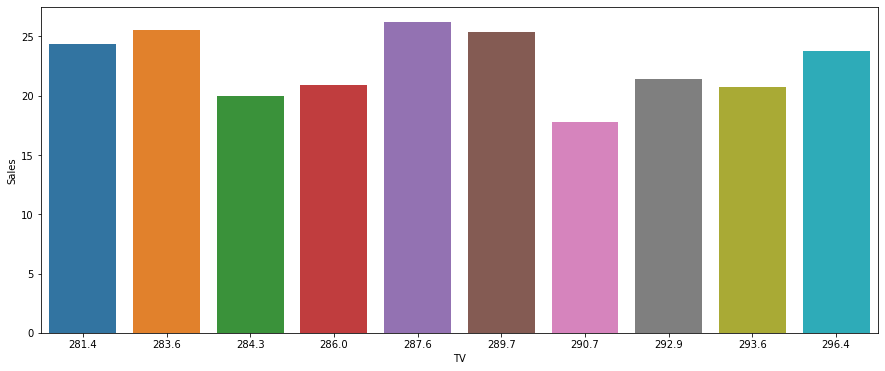

In [11]:
plt.figure(figsize=(15,6))
sns.barplot(x=TV_Spend[0:10],y=dataset['Sales'])
plt.show()

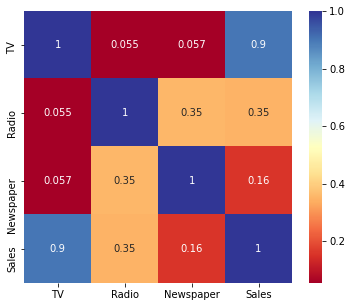

In [39]:
plt.figure(figsize=(6,5))
sns.heatmap(dataset.corr(),cmap='RdYlBu',annot=True)
plt.show()

# Prediction Model

In [13]:
x=dataset.drop(columns=['Sales'])
y=dataset['Sales']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.4,random_state=1)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 3)
(120, 3)
(80,)
(120,)


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model=LinearRegression()

In [18]:
model.fit(x_train,y_train)

LinearRegression()

In [19]:
y_predict=model.predict(x_test)

In [20]:
from sklearn.metrics import r2_score,mean_squared_error


In [33]:
display(HTML(f'<h3>R Square value : {round((r2_score(y_test,y_predict))*100,2)}%</h3>'))
print('Mean Square Error :',mean_squared_error(y_test,y_predict))

Mean Square Error : 3.4733329899967713


In [22]:
#b0 value
model.intercept_

4.81553375049911

In [23]:
#slope
model.coef_  # b1,b2 and b3

array([ 0.05201378,  0.12164799, -0.00693454])

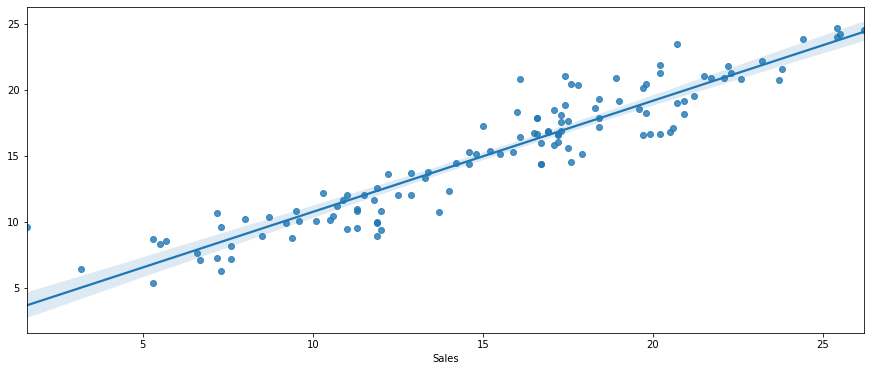

In [24]:
plt.figure(figsize=(15,6))
sns.regplot(x=y_test, y=y_predict) 
plt.show()

In [25]:
y_error=y_test-y_predict
# accurcy=round((y_predict-y_test)*100/y_test,2)

error_data=pd.DataFrame(np.array([y_test,y_predict,y_error])).T
error_data=error_data.rename(columns={0:'Actual',1:'Predicted',2:'Error',3:'Accurcy%'})
error_data


,Actual,Predicted,Error
0,23.8,21.552347,2.247653
1,16.6,17.841943,-1.241943
2,11.9,9.912244,1.987756
3,19.8,20.470040,-0.670040
4,17.6,20.399697,-2.799697
...,...,...,...
115,17.2,16.070023,1.129977
116,12.9,12.001379,0.898621
117,1.6,9.608873,-8.008873
118,10.6,10.437922,0.162078


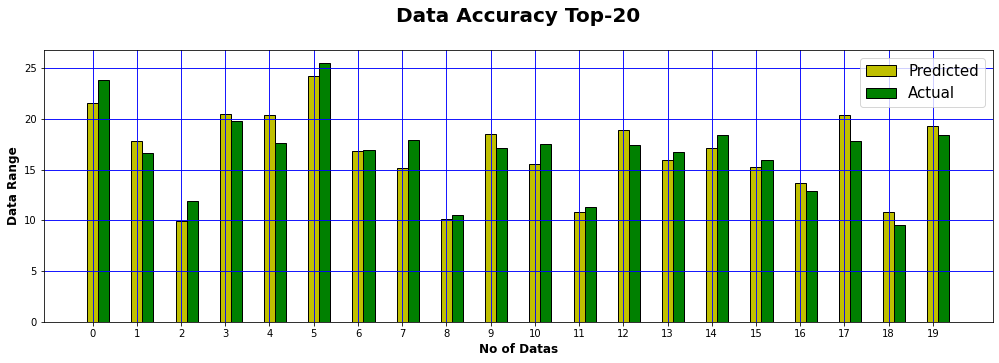

In [41]:
plt.figure(figsize=(17,5))
no_of_data_show =20 # type here how many data you want to show
predicted = list(error_data['Predicted'])[0:no_of_data_show] 
actual = list(error_data['Actual'])[0:no_of_data_show]

n=len(predicted) 
r = np.arange(n)
width = 0.25

  
plt.bar(r, predicted, color = 'y',width = width, edgecolor = 'black',label='Predicted')
plt.bar(r + width, actual, color = 'g',width = width, edgecolor = 'black',label='Actual')
  
plt.xlabel("No of Datas",fontsize=12,weight="bold")
plt.ylabel("Data Range",fontsize=12,weight="bold")
plt.title(f"Data Accuracy Top-{no_of_data_show}\n",fontsize=20,weight="bold")
plt.legend(fontsize=15)
plt.grid(color='b', linestyle='-', linewidth=0.9)
plt.xticks(np.arange(0, no_of_data_show, step=1)) 
plt.show()